We Present how to predict IHSG By Day, Month and Year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
%matplotlib inline
import random

from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_excel('IHSG-2025-10-13.xlsx')
df

,No,Kode_Saham,Nama_Perusahaan,Remarks,Sebelumnya,Open_Price,Tanggal_Perdagangan_Terakhir,First_Trade,Tertinggi,Terendah,...,Bid,Bid_Volume,Listed_Shares,Tradeble_Shares,Weight_for_Index,Foreign_Sell,Foreign_Buy,Non_Regular_Volume,Non_Regular_Value,Non_Regular_Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1H30510000A121------------,7700,7625,13 Okt 2025,7600,7975,7525,...,7800,129300,7786891760,7786891760,1517665204,2098600,9577900,166743,1289115615,8
1,2,AALI,Astra Agro Lestari Tbk.,XDMO113E000000D232------------,7800,7700,13 Okt 2025,7700,7850,7275,...,7775,23400,1924688333,1924688333,390711732,305600,2159800,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,81,0,13 Okt 2025,0,73,73,...,0,0,3935892857,3935892857,1298844643,100000,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,2710,0,13 Okt 2025,0,2710,2710,...,2690,100,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2780,2780,13 Okt 2025,2780,2780,2750,...,2760,24100,2753165000,2753165000,417379814,53800,5000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,952,ZATA,Bersama Zatta Jaya Tbk.,--UO1130000000E741------------,68,67,13 Okt 2025,66,74,64,...,68,2989300,8496000000,1700000000,2208110400,9412700,9633400,0,0,0
952,953,ZBRA,Dosni Roha Indonesia Tbk.,--UO2100000000C311M--L---Y----,50,0,13 Okt 2025,0,0,0,...,0,0,2510706263,2510706263,502141253,0,0,0,0,0
953,954,ZINC,Kapuas Prima Coal Tbk.,--U-4100000000B146--D-S------X,34,0,13 Okt 2025,0,37,36,...,35,995800,25250000000,25250000000,8733975000,305000,500000,0,0,0
954,955,ZONE,Mega Perintis Tbk.,--UO2130000000E741------------,610,0,13 Okt 2025,0,610,595,...,595,400,870171478,870171478,132527116,0,0,0,0,0


In [45]:
df_2 = pd.read_excel('IHSG-2022-10-13.xlsx')
df_2

,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,...,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AALI,Astra Agro Lestari Tbk.,--M-18APM16000D232------------,8050,0,13 Okt 2022,0,8125,8000,...,7975,67300,1924688333,1924688333,390711732,880400,37900,170100,1369305000,1
1,2,ABBA,Mahaka Media Tbk.,--U-2105000000E614------------,187,0,13 Okt 2022,0,193,176,...,177,121200,3935892857,3935892857,1342139464,238600,3684100,0,0,0
2,3,ABDA,Asuransi Bina Dana Arta Tbk.,--U-2105000000G412-----------X,6050,0,13 Okt 2022,0,0,0,...,5700,300,620806680,620806680,78594126,0,0,0,0,0
3,4,ABMM,ABM Investama Tbk.,--M-1175000000C311------------,4050,0,13 Okt 2022,0,4220,4020,...,4050,108000,2753165000,2753165000,568803889,1298200,1022100,0,0,0
4,5,ACES,Ace Hardware Indonesia Tbk.,--M-187EMD0000E743------------,545,0,13 Okt 2022,0,545,510,...,0,0,17150000000,17150000000,6832560000,82918300,36413300,500,257500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,YULE,Yulie Sekuritas Indonesia Tbk.,--U-2105000000G312------------,2110,0,13 Okt 2022,0,2100,2100,...,2050,2000,1785000000,1785000000,1217548500,0,0,59500,119000000,3
809,810,ZBRA,Dosni Roha Indonesia Tbk.,--U-2135000000C311------------,555,0,13 Okt 2022,0,555,540,...,545,2200,2510706263,2510706263,432343618,0,57600,0,0,0
810,811,ZINC,Kapuas Prima Coal Tbk.,--U-2105000000B146------------,70,0,13 Okt 2022,0,71,69,...,70,324800,25250000000,25250000000,8751650000,8304600,4626400,4300,408500,1
811,812,ZONE,Mega Perintis Tbk.,--M-2135000000E741------------,1135,0,13 Okt 2022,0,1150,1060,...,1150,5800,870171478,870171478,116167892,34700,34800,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   No                            956 non-null    int64  
 1   Kode_Saham                    956 non-null    object 
 2   Nama_Perusahaan               956 non-null    object 
 3   Remarks                       956 non-null    object 
 4   Sebelumnya                    956 non-null    int64  
 5   Open_Price                    956 non-null    int64  
 6   Tanggal_Perdagangan_Terakhir  956 non-null    object 
 7   First_Trade                   956 non-null    int64  
 8   Tertinggi                     956 non-null    int64  
 9   Terendah                      956 non-null    int64  
 10  Penutupan                     956 non-null    int64  
 11  Selisih                       956 non-null    int64  
 12  Volume                        956 non-null    int64  
 13  Nilai

In [39]:
df.value_counts()

No   Kode_Saham  Nama_Perusahaan                 Remarks                         Sebelumnya  Open_Price  Tanggal_Perdagangan_Terakhir  First_Trade  Tertinggi  Terendah  Penutupan  Selisih  Volume    Nilai         Frekuensi  Index_Individual  Offer  Offer_Volume  Bid   Bid_Volume  Listed_Shares  Tradeble_Shares  Weight_for_Index  Foreign_Sell  Foreign_Buy  Non_Regular_Volume  Non_Regular_Value  Non_Regular_Frequency
1    AADI        Adaro Andalan Indonesia Tbk.    --MO1H30510000A121------------  7700        7625        13 Okt 2025                   7600         7975       7525      7825        125     19216600  150589130000  10026      141.0             7825   30400         7800  129300      7786891760     7786891760       1517665204        2098600       9577900      166743              1289115615         8                        1
643  NSSS        Nusantara Sawit Sejahtera Tbk.  --UO2105000000D232------------  540         520         13 Okt 2025                   520          550      

In [40]:
df.describe()

,No,Sebelumnya,Open_Price,First_Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,...,Bid,Bid_Volume,Listed_Shares,Tradeble_Shares,Weight_for_Index,Foreign_Sell,Foreign_Buy,Non_Regular_Volume,Non_Regular_Value,Non_Regular_Frequency
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02,9.560000e+02,...,956.000000,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,956.000000
mean,478.500000,1804.857741,1475.726987,1474.306485,1715.369247,1640.775105,1795.282427,-9.575314,3.838276e+07,2.479099e+10,...,1644.336820,2.466518e+06,1.235248e+10,1.195776e+10,3.923177e+09,7.314207e+06,7.245997e+06,5.237563e+06,3.877844e+09,0.478033
std,276.117729,11999.414192,11845.433817,11832.658045,12082.903008,11733.827168,11927.234676,286.455741,1.988027e+08,1.250614e+11,...,11812.971287,2.851495e+07,4.359230e+10,4.327151e+10,2.928352e+10,6.079711e+07,5.662668e+07,9.566526e+07,9.265370e+10,3.595014
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5000.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,239.750000,108.750000,0.000000,0.000000,88.000000,83.750000,109.000000,-5.250000,1.427750e+05,6.945715e+07,...,74.000000,1.000000e+03,1.434764e+09,1.350374e+09,2.308962e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,478.500000,282.000000,150.000000,149.000000,249.000000,230.000000,284.000000,0.000000,2.707100e+06,6.365765e+08,...,225.000000,2.685000e+04,3.551107e+09,3.428549e+09,6.851862e+08,1.205000e+04,3.355000e+04,0.000000e+00,0.000000e+00,0.000000
75%,717.250000,910.000000,590.000000,586.250000,862.500000,815.000000,906.250000,1.000000,1.625898e+07,4.314585e+09,...,815.000000,2.977750e+05,1.012045e+10,9.935026e+09,2.379498e+09,9.977000e+05,1.340350e+06,0.000000e+00,0.000000e+00,0.000000
max,956.000000,280500.000000,280500.000000,280000.000000,280500.000000,275500.000000,275500.000000,4075.000000,3.787181e+09,1.987432e+12,...,275500.000000,8.232889e+08,1.140573e+12,1.140573e+12,8.786976e+11,1.295155e+09,1.272177e+09,2.669337e+09,2.856191e+12,95.000000


In [41]:
numerics_cols = df.select_dtypes(include=[np.number]).columns
numerics_cols = numerics_cols.drop(['No'])
numerics_cols # columns numeric equivalent

Index(['Sebelumnya', 'Open_Price', 'First_Trade', 'Tertinggi', 'Terendah',
       'Penutupan', 'Selisih', 'Volume', 'Nilai', 'Frekuensi',
       'Index_Individual', 'Offer', 'Offer_Volume', 'Bid', 'Bid_Volume',
       'Listed_Shares', 'Tradeble_Shares', 'Weight_for_Index', 'Foreign_Sell',
       'Foreign_Buy', 'Non_Regular_Volume', 'Non_Regular_Value',
       'Non_Regular_Frequency'],
      dtype='object')

Data Visualitation

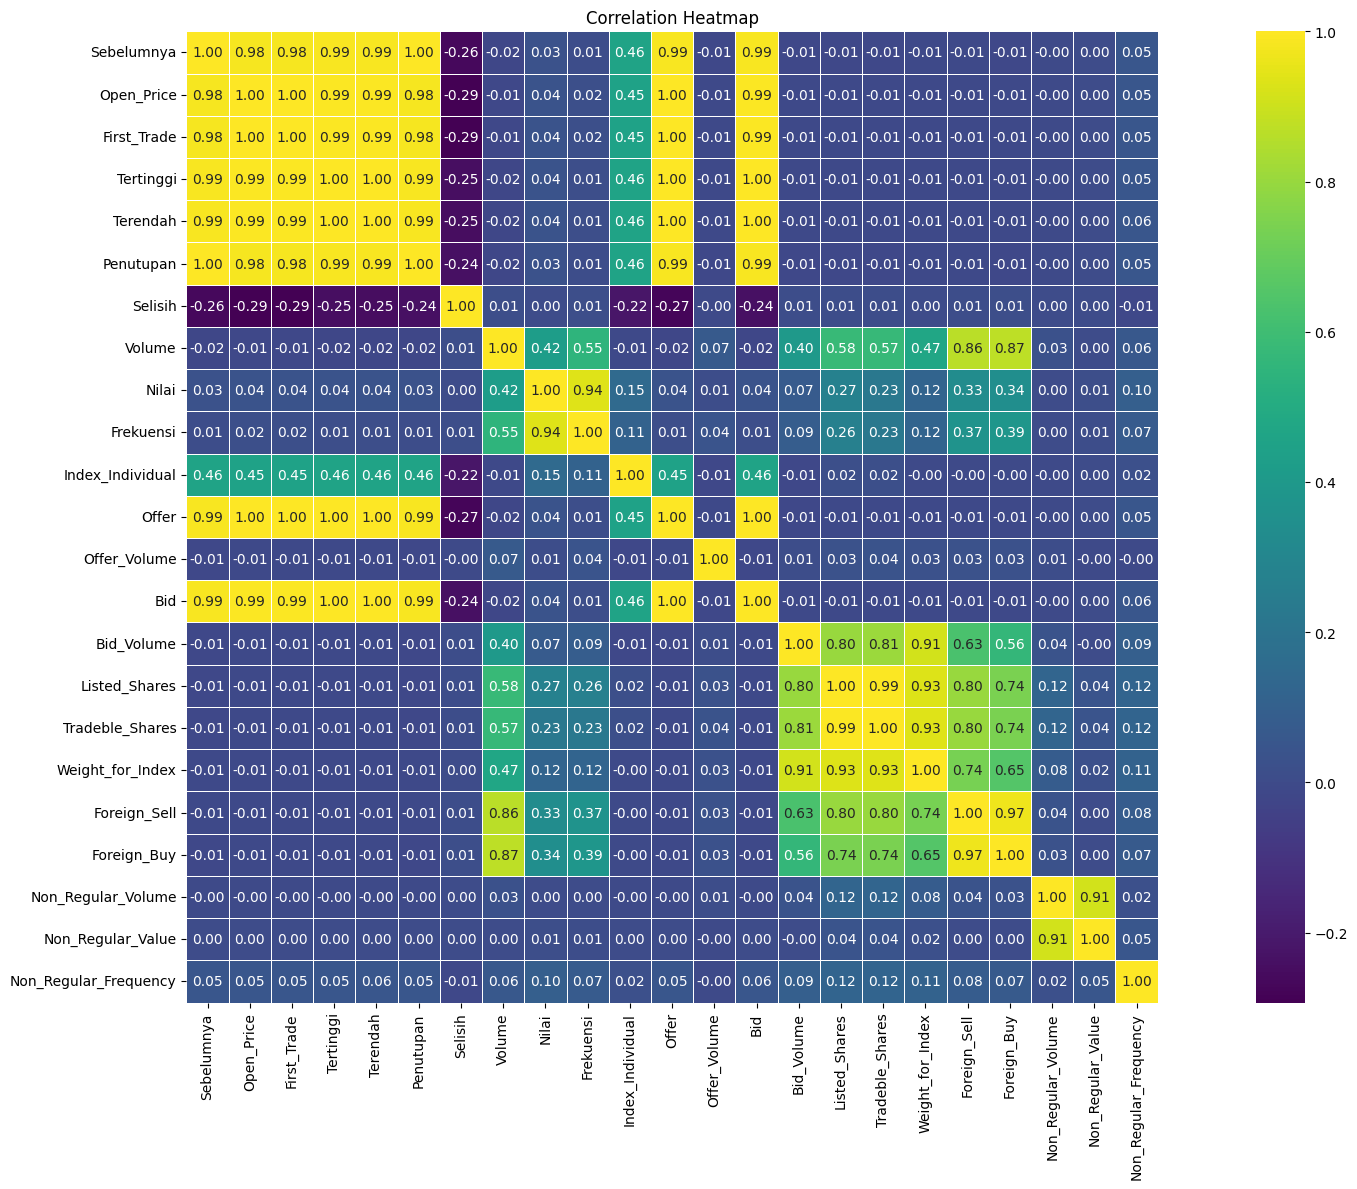

In [42]:
# visualitate heatmap correlation

plt.figure(figsize=(20, 12))
sns.heatmap(data=df[numerics_cols].corr(), annot=True, cmap='viridis', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Close price visualitation

plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x=df.index, y='penutupan', label='Close Price History', color='blue')

max_price = df['penutupan'].max()
max_price_date = df['penutupan'].idxmax()

# Annotate the hight price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='red')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Clos Price IHSG')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates)